# Real Business Cycle (RBC) model
This introductory notebook demonstrates the basics of the Real Business Cycle (RBC) model used in economics

The materials and equations are from Chapter 2 of the following book:
- Costa, C. (2018). Understanding DSGE models: Theory and Applications. Vernon Press.

This book is brilliant and I highly recommend to anyone interested in studying the DSGE modeling regime used in macroeconomics.


# Table of contents 


- [1. Household problem](#1.-Household-problem)
    - 1.1 Model with two goods
        - 1.1.1 Python example
        - 1.1.2 Marginal rate of substitution (MRS)
    - 1.2 Budget constraint
    - 1.3 Optimal choice
        - 1.3.1 Maximization & constraint
        - 1.3.2 Optimization: Lagrangian
        - 1.3.3 Substitution and income effects
- [2. Dynamic structure of consumption savings](#2.-Dynamic-structure-of-consumption-savings)
    - 2.1 Two-period example
    - 2.2 Optimal intertemporal choice
        - 2.2.1 Maximization & constraint
        - 2.2.2 Optimization: Lagrangian
    - 2.3 Input markets
        - 2.3.1 Maximization & constraint
        - 2.3.2 Optimization: Lagrangian
- [3. The RBC model](#3.-The-RBC-model)
    - 3.1 Model assumptions
    - 3.2 Households
        - 3.2.1 Household assumptions
        - 3.2.2 Maximization
        - 3.2.3 Optimization: Lagrangian
   - 3.3 Firms
       - 3.3.1 Firms assumptions
       - 3.3.2 Cobb-Douglas
       - 3.3.3 Productivity shock
       - 3.3.4 Marginal cost calculation
  - 3.4 Equilibrium conditions
      - 3.4.1 Structure of the model
      - 3.4.2 Steady state
- [4. Solve steady state](#4.-Solve-steady-state)
    - 4.1 Set parameters names and values
    - 4.2 Solve model
- [5. Log-linearization](#5.-Log-linearization)

In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-darkgrid')

# 1.  Household problem

## 1.1 Model with two goods

Two factors that provide utility are consumption (C) and leaisure

$$U(C, \ \ \text{leisure})$$

Both treated as goods

Utility function has following properties:
1. Strictly increasing, $\frac{\partial u}{\partial C}>0$ and $\frac{\partial u}{\partial \text{leisure}}>0$
2. Diminishing marginal returns, $\frac{\partial^2 u}{\partial C^2}<0$ and $\frac{\partial u^2}{\partial \text{leisure}^2}<0$




### 1.1.1 Python example: Model with two goods
Code reference: https://datascience.quantecon.org/scientific/optimization.html

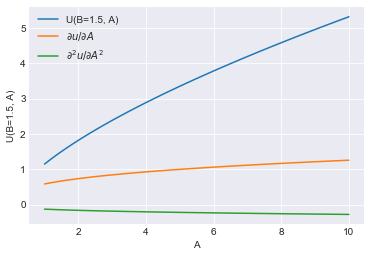

In [2]:
def U(A, B, alpha=1/3):
    return B**alpha * A**(1-alpha)
def U_b(A,B, alpha=1/3):
    return alpha*A**(alpha-1)*B**(1-alpha)
def U_a(A,B, alpha=1/3):
    return (1-alpha)*A**(alpha)*B**(-alpha)

def U_aa(A,B, alpha=1/3):
    return A**alpha*(alpha-1)*alpha*B**(-alpha-1)

fig, ax = plt.subplots()
B = 1.5
A = np.linspace(1, 10, 100)
ax.plot(A, U(A, B), label = "U(B=1.5, A)")
ax.plot(A, U_a(A,B), label=r'$\partial u/ \partial A$')
ax.plot(A, U_aa(A,B), label=r'$\partial^2 u/ \partial A^2$')
ax.set_xlabel("A")
ax.set_ylabel("U(B=1.5, A)")
plt.legend();

### 1.1.2 Marginal rate of substitution (MRS)

- Measures how many units of a good one will give up in exchange for another 
    - The slope on the graph is the MRS
    
$$MRS_{X,Y}= -\frac{\partial Y}{\partial X}\Bigg|_{u=U_1}=-\frac{MU_X}{MU_Y}\Bigg|_{u=U_i}$$

#### 1.1.2.1 Python example: Plotting indifference curves
- Code reference: https://datascience.quantecon.org/scientific/optimization.html

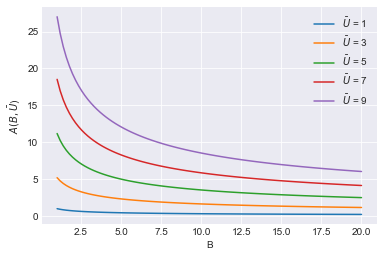

In [3]:
A = np.linspace(1, 10, 100)
B = np.linspace(1, 20, 100).reshape((100, 1))

def U(A, B, alpha=1/3):
    return B**alpha * A**(1-alpha)

def A_indifference(B, ubar, alpha=1/3):
    return ubar**(1/(1-alpha)) * B**(-alpha/(1-alpha))

def plot_indifference_curves(ax, alpha=1/3):
    ubar = np.arange(1, 11, 2)
    ax.plot(B, A_indifference(B, ubar, alpha))
    ax.legend([r"$\bar{U}$" + " = {}".format(i) for i in ubar])
    ax.set_xlabel("B")
    ax.set_ylabel(r"$A(B, \bar{U}$)")

fig, ax = plt.subplots()
plot_indifference_curves(ax)

## 1.2 Budget constraint

### 1.2.1 Python example: Budget constraint

In [4]:
def consum(max_work, wage, price, leisure):
    c = (max_work*wage)/price-(wage/price)*leisure
    return c

In [5]:
max_work, wage, price, leisure = [70, 30, 10,30]
consum = consum(max_work,wage,price,leisure)
print('Total consumption: {}'.format(consum))

Total consumption: 120.0


### 1.2.2 Graph: Budget constraint 

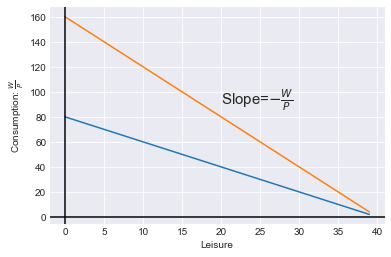

In [6]:
def budget_constraint_graph(wage, price, hours_worked):
    vert_intercept = (hours_worked*wage)/price
    slope = -(wage/price)
    line = []
    for hours in range(hours_worked):
        line.append(vert_intercept+slope*hours)
    plt.plot(line)

for wage in [10,20]:
    budget_constraint_graph(wage, 5, 40)
 
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Leisure')
plt.ylabel(r'Consumption: $\frac{W}{P}$')
plt.text(20, 90, r"Slope=$-\frac{W}{P}$", size=15);

## 1.3 Optimal choice

### 1.3.1 Maxzimiation & constraint
$$
\max_{c, L}  u(c, L)\\
\text{s.t.} \ Pc=WL \\
L = u(c, \ L)-\lambda(Pc-WL)
$$

### 1.3.2 Optimization: Lagrangian

### Supply of labor
$$\frac{\partial u/\partial L}{\partial u /\partial c}= - \frac{W}{P}\tag{2.1.1}$$

`Household problem:`

To maximize utility an individual purchase gods that deplates their total income equating to
- The physical rate of tradeoff between any two goods (MRS) and the rate at which a good can be exchanged for another on the market.

`Optimal result of the problem of the household:` 

The optimal consumption is the point which is on the highest indifference curve AND is within the individual’s budget constraint.


### 1.3.3 Substitution and income effects

The effects of changes in real wages on optimal leisure choice has two components: 
1. a substitution effect
2. a income effect. 


- In the consumption-leisure model:
    - The substitution effect of higher real wages leads an indvidual to work more 
        - Because the opportunity cost of leisure has risen. 
    - On the other hand, the income effect of higher real wages leads an individual to choose more leisure

# 2. Dynamic structure of consumption savings

$$u(c_1, c_2, c_3, \cdots) = u(c_1)+\beta u(c_2)+\beta^2 u(c_3)$$

`Intertemporal discount factor:` $\beta<1$


## 2.1 Two-period example
$$P_1 c_1 + A_1 = R A_0+Y_1 \\
P_2 c_2 + A_2 = R A_1+Y_2 \\
R= 1+r$$

Savings:
$$A_1-A_0=S_1 = (R-1)A_0+Y_1-P_1c_1$$

Solving budget constraint 1 and substitute:
$$P_2c_2 = R[RA_0+Y_1-P_1c_1]+Y_2$$

Divide both sides by R:
$$P_1c_1+\frac{P_2c_2}{R} = Y_1+\frac{Y_2}{R}+RA_0$$

- RHS: Discounted intertemporal resource
- LHS: Discounted intertemporal consumption

Solve for $c_2$:
$$c_2 = \Big[\Big(\frac{R}{P_2}\Big)Y_1+\frac{Y_2}{P_2}\Big]-\Big[\frac{P_1R}{P_2}\Big]c_1$$

### 2.1.1. Graph: Intertemporal budget constraint

In [7]:
def intertemporal_bc(R=1.01, p2=10, p1=5, Y1=30, Y2=40, c1=5):
    vert_int = (R/p2)*Y1+(Y2/p2)
    slope = -((p1*R)/p2)*c1
    eq = vert_int+slope
    return eq

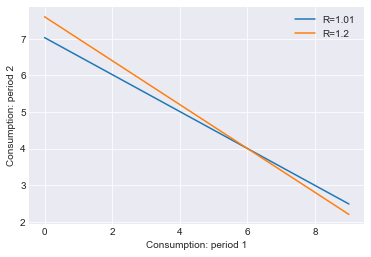

In [8]:
line1 = [ ]
line2 = []
for consum_period_1 in range(10):
    line1.append(intertemporal_bc(c1=consum_period_1))
    line2.append(intertemporal_bc(R=1.2,c1=consum_period_1))
    
plt.plot(line1, label="R=1.01")
plt.plot(line2, label = "R=1.2")

plt.xlabel("Consumption: period 1")
plt.ylabel("Consumption: period 2")
plt.legend();

## 2.2 Optimal intertemporal choice

### 2.2.1 Maximization & constraint
$$u(c_1, c_2) = u(c_1)+\beta u(c_2)$$

$$
\max_{c1,c2, A_1}  u(c1)+\beta u(c_2)\\
\text{s.t.}\\
\ P_1c_1+A_1= RA_0+Y_1 \\
P_2c_2= RA_1+Y_2
$$

### 2.2.2 Optimization: Lagrangian
$$
L = u(c_1)+\beta u(c_2)-\lambda_1[P_1c_1+A_1-RA_0-Y_1]-\lambda_2[P_2c_2-RA_1-Y_2]\\
\frac{L}{c_1} = \frac{\partial u}{\partial c_1}-\lambda_1P_1=0\\
\frac{L}{c_2} = \beta\frac{\partial u}{\partial c_2}-\lambda_2P_2=0\\
\frac{L}{A_1} = -\lambda_1+\lambda_2R=0\\
\lambda_1 = \frac{\partial u/\partial c_1}{P_1}
, \ \ \lambda_2 = \beta\frac{\partial u/\partial c_2}{P_2}\\
\text{Define} \ \  \pi_2= \frac{P_2}{P_1} $$

#### 2.2.2.1 Euler equation:
$$-\frac{\partial u/\partial c_1}{\beta\partial u/\partial c_2}=-\frac{R}{\pi_2}$$

- The Euler equation relates to consumption for both periods (MRS c1-c2) with the relative price of intertemporal consumption
- On the other hand, the budget constraint’s slope determines the premium, R, for saving more. 
    - High values for β lead to indifference curves having low slopes.


- `Intertemporal substitution effect:` change in relative price which motivates households to increase future consumption in relation to the present


## 2.3 Input markets
- Firms represent the agents that acquire inputs, while households are those that supply them

### 2.3.1 Maximization & constraint
Demand inputs:
$$Y = f(K^d, L^d) \\
\max_{K^d,L^d} = PY-WL^d-RK^d$$

### 2.3.2 Optimization: Lagrangian
$$
P\frac{\partial Y}{\partial L^d}-W=0\\
P\frac{\partial Y}{\partial K^d}-R=0
$$

#### Demand for inputs:

Marginal productivity of Labor = Real marginal cost of labor
$$
\frac{\partial Y}{\partial L^d}=\frac{W}{P}\\
$$

Marginal productivity of capital = Real marginal cost of capital
$$
\frac{\partial Y}{\partial K^d}=\frac{R}{P}\\
$$


#### Relative demand for inputs:

Marginal rate of technical substitution (MRTS)= Economic rate of substitution
$$
\frac{\frac{\partial Y}{\partial L^d}}{\frac{\partial Y}{\partial K^d}}=-\frac{W}{R}
$$

`MRTS:` Indicates the additional units of capital that can offset one less unit of labor


Agents make decisions using the marginal rate of substitution between goods and their relative prices by:
1. Households consumption-leisure tradeoff analyzing the relative price between these goods (real wages). 
      - Intertemporal choice is the tradeoff is between consumption today and in the future
          - The relative price is the nominal interest rate. 
2. Firms make a similar decision when determining the combination of labor and capital by analyzing the relative prices of their inputs.



# 3. The RBC model

Structural model of the economy is presented and solved, step by step. 

1. Present agents (households and firms)
2. Equilibrium conditions are shown. 
3. The state is found and the equations that make up the model’s equilibrium are log-linearized.


## 3.1 Model assumptions:
- Assumption 2.2.1. The economy is closed, with no government or financial sector.
- Assumption 2.2.2. This economy does not have a currency (Barter economy).
- Assumption 2.2.3. Adjustment costs are not present.

## 3.2 Households

### 3.2.1 Household assumptions
- Assumption 2.2.4. The model is made up of a unitary set of households indexed by j ∈ [0, 1] whose goal is to maximize intertemporal welfare function. 
    - A utility function is used, additively separable into consumption (C) and labor (L).
- Assumption 2.2.5. Consumption is intertemporally additively separable (no habit formation).
- Assumption 2.2.6. Population growth does not exist.
- Assumption 2.2.7. The labor market is of perfect competition (no wage rigidity).

### 3.2.2 Maximization & Constraint
#### Representative household optimal welfare function
$$\max_{C_{j,t},L_{j,t},K_{j,t+1}} E_t \sum^{\infty}_{t=0} \beta^t\bigg(\frac{C_{j,t}^{1-\sigma}}{1-\sigma}- \frac{L_{j,t}^{1+\varphi}}{1+\varphi}\bigg)\tag{2.1}\\
$$
Where:
- $E_t=\text{expectations operator}$
- $C=\text{Consumption}$
- $L=\text{Hours worked}$
- $\sigma= \text{relative risk aversion}$
- $\varphi= \text{marginal disutility of labor supply}$


#### Intermporal budget constraint:
$$P_t(C_{j,t}+I_{j,t})= W_tL_{j,t}+R_tK_{j,t}+\Pi_t\tag{2.2}$$

Where:
- P=price
- I=investment
- W= wages
- K= capital stock
- R= return on capital
- $\Pi$= frims profit (dividends)

#### Capital accumulation over time:
$$K_{j,t+1} = (1-\delta)K_{j,t}+I_{j,t}\tag{2.3}$$

### 3.2.3 Optimization: Lagrangian

#### Solve problem of the household using 2.1,2.2, 2.3
$$
L = E_t \sum^{\infty}_{t=0} \beta^t\bigg(\frac{C_{j,t}^{1-\sigma}}{1-\sigma}- \frac{L_{j,t}^{1+\varphi}}{1+\varphi}\bigg)\\-\lambda_{j,t}[P_tC_{j,t}+P_tK_{j,t+1}-P_t(1-\delta)K_{j,t}-W_tL_{j,t}-R_tK_{j,t}-\Pi_t]\tag{2.4}
$$

Solve F.O.C:
$$
\frac{\partial L}{\partial C_{j,t}}=C_{j,t}^{-\sigma}- \lambda_{j,t}P_t=0\tag{2.5}$$
$$\frac{\partial L}{\partial L_{j,t}}= -L^{\varphi}_{j,t}+\lambda_{j,t} W_t=0\tag{2.6}$$
$$
\frac{\partial L}{\partial K_{j,t+1}}= -\lambda_{j,t} P_t +\beta E_t\lambda_{j,t+1}[(1-\delta) E_tP_{t+1}E_tR_{t+1}]=0 \tag{2.7}
$$

#### Household labor supply equation
Consumption-leisure MRS = Consumption-leisure relative price

$$
C_{j,t}^\sigma L^\varphi_{j,t} = \frac{W_t}{P_t}\tag{2.8}
$$

#### Euler equation Plug 2.5 into 2.7
$$-C_{j,t}^{-\sigma} + E_t \Big\{\frac{C_{j,t+1}^{-\sigma}}{P_{t+1}}[(1-\delta)P_{t+1}+R_{t+1}]
\Big\}=0\\
\Big(\frac{E_t C_{j,t+1}}{C_{j,t}}\Big)^\sigma = \beta\Big[(1-\delta)+ E_t\frac{R_{t+1}}{P_{t+1}}\Big]
\tag{2.9}$$


- The previous equation determines the household’s savings decision
    -  They compare the utility of consuming an additional amount today compared to in the future

Assume that $\beta=1, \ \delta=1$
$$-E_t\Big(\frac{1}{\pi_{t+1}}\frac{ C_{j,t+1}}{C_{j,t}}\Big)^\sigma = -E_t\frac{r_{t+1}}{\pi_{t+1}}$$

Where:
- Real rate of return on capital: $E_tr_{t+1}=E_t\frac{R_{t+1}}{P_{t+1}}$
    
The household problem has two choices:
1. Intratemporal choice: choose between consumption and leisure 
2. Intertemporal choice: choose between present and future consumption


## 3.3 Firms

### 3.3.1 Firms assumptions
- Assumption 2.2.8. Firms indexed by j that maximize profit observing a structure of perfect competition (Zero profits)
- Assumption 2.2.9. Productivity growth is ignored.


### 3.3.2 Cobb-Douglas

$Y_{j,t}= A_tK^\alpha_{j,t}L^{1-\alpha}_{j,t}\tag{2.10}$

Where:
- $A_t$= productivity
- $Y_t$= product
- $\sigma$= elasticity of production w.r.t. capital


- Production function must have following properties (similar to household utility function): 
- Strictly increasing (FK > 0 and FL > 0)
- Strictly concave (FK K < 0 e FLL < 0)
- Constant returns to scale
- Satisfy Inada conditions

#### 3.3.2.1 Max profit function

$$\max_{L_{j,t},K_{j,t}}\Pi_{j,t} =  A_t K_{j,t}^\sigma L_{j,t}^{1-\sigma}P_{j,t}-W_tL_{j,t}-R_tK_{j,t}\tag{2.11}$$

#### 3.3.2.2 Optimization lagrangian:
Demand for capital: MCK=MPK
$$\frac{R_t}{P_{j,t}}=\alpha \frac{Y_{j,t}}{K_{j,t}}\tag{2.14}$$
Demand for labor: MCL=MPL
$$\frac{W_t}{P_{j,t}}=(1-\alpha)\frac{Y_{j,t}}{L_{j,t}}\tag{2.15}
$$

### 3.3.3 Productivity shock

$$log A_t=(1-\rho_a)logA_{ss}+\rho_A logA_{t-1}+\varepsilon_t\tag{2.16}$$

Where:
- $A_{ss}$= value of productivity at steady state 
- $\rho_{A}$= autoregressive paramater of productiity


### 3.3.4 Marginal cost calculation
- RBC approach: Price level= Marginal cost
- Combine 2.14 & 2.15

MRTS=ERS

$$-\frac{W_t}{R_t} = - \frac{(1-\alpha)K_{j,t}}{\alpha L_{j,t}}$$

-  RHS: marginal rate of technical substitution
    - The rate at which labor can be replaced by capital while maintaining a constant level of production. 
- LHS: economic rate of substitution, 
    - The rate at which labor can be replaced by capital while maintaining the same cost.

Rearranging:
$$ L_{j,t}= \frac{1-\alpha}{\alpha}-\frac{R_t}{W_t}K_{j,t}\tag{2.17}$$

Substitue 2.17 into production function 2.10
$$Y_{j,t}= A_t K^\alpha_{j,t}\Big[\frac{1-\alpha}{\alpha}-\frac{R_t}{W_t}K_{j,t}\Big]^{1-\alpha}\\
K_{j,t}= \frac{Y_{j,t}}{A_t} \Big[\frac{\alpha}{1-\alpha}\frac{W_t}{R_t}\Big]^{1-\alpha}\tag{2.18}$$

Substitute 2.18 in 2.17:

$$
L_{j,t} = \frac{A_t}{Y_{j,t}} \Big[\frac{\alpha}{1-\alpha}\frac{W_t}{R_t}\Big]^{-\alpha}
$$

#### Total cost function:
$$TC_{j,t} = W_tL_{j,t}+R_tK_{j,t}$$

Substitute 2.18 and 2.19 into total cost function

$$
TC_{j,t} = \frac{Y_{j,t}}{A_t}\Big(\frac{W_t}{1-\alpha}\Big)^{1-\alpha}\Big(\frac{R_t}{\alpha}\Big)^\alpha
$$

#### Marginal cost:

$$
MC_{j,t} = \frac{1}{A_t}\Big(\frac{W_t}{1-\alpha}\Big)^{1-\alpha}\Big(\frac{R_t}{\alpha}\Big)^\alpha\tag{2.20}
$$

General price level: marginal cost depends solely on productivity and the prices of the factors of production

$$
P_{t} = \frac{1}{A_t}\Big(\frac{W_t}{1-\alpha}\Big)^{1-\alpha}\Big(\frac{R_t}{\alpha}\Big)^\alpha \tag{2.21}
$$



## 3.4 Equilibrium conditions

We have now described the behavior of firms and households, now we examine the interaction between them in order to determine macroeconomic equilibrium.


Aiming to max utility:
1. Households decide how much to:


- consume (C)
- invest (I)
- labor supply (L)


2. Firms decide how much to (Y) produce:


- Using available technology 
- Choosing the factors of production (capital and labor)

Both households and firms take prices as given



The model’s equilibrium consists of the following blocks:


1. A price system: W , R and P
2. An endowment of values for goods and inputs Y , C, I , L and K 
3. A production-possibility frontier where aggregate supply= aggregate demand


### 3.4.1 Structure of the model

$$
\begin{align}
C_t^\sigma L_t^\varphi & = \frac{W_t}{P_t} & \text{Labor supply, 2.8} \\
\Big(\frac{E_t C_{j,t+1}}{C_{j,t}}\Big)^\sigma &= \beta\Big[(1-\delta)+ E_t\frac{R_{t+1}}{P_{t+1}}\Big]& \text{Euler, 2.9} \\
K_{t+1} & = (1-\delta)K_t + I_t& \text{Law of motion of capital, 2.3}\\ 
y_t & = A_t K_t^\alpha L_t^{1 - \alpha} & \text{Production function, 2.10} \\
K_t & =\alpha\frac{Y_t}{\frac{R_t}{P_t}} & \text{Demand for capital, 2.14} \\
L_t & =(1-\alpha)\frac{Y_t}{\frac{W_t}{P_t}} & \text{Demand for labor, 2.15} \\
P_t & =\frac{1}{A_t}\Big(\frac{W_t}{1-\alpha}\Big)^{1-\alpha}\Big(\frac{R_t}{\alpha}\Big)^\alpha & \text{Price level=MC, 2.21}\\
Y_t & =C_t+I_t & \text{Equilibrium condition}\\
logA_t & =(1-\rho_a)logA_{ss}+\rho_A logA_{t-1}+\varepsilon_t& \text{Productivity shock, 2.16}
\end{align}
$$

#### 3.4.1.1 Households
$$C_{ss}^\sigma L_{ss}^\varphi = \frac{W_{ss}}{P_{ss}}  \tag{Labor supply, 2.23}$$
$$1 = \beta\Big[(1-\delta)+ E_t\frac{R_{ss}}{P_{ss}}\Big] \tag{Euler, 2.24}$$
$$I_{ss}=\delta K_{ss}\tag{2.25}$$

#### 3.4.1.2 Firms
$$K_{ss}=\alpha \frac{Y_{ss}}{R_{ss}/P_{ss}}\tag{2.26}$$
$$L_{ss}=(1-\alpha)\frac{Y_{ss}}{W_{ss}/P_{ss}}\tag{2.27}$$
$$Y_{ss}= K_{ss}^\alpha L_{ss}^{1-\alpha}\tag{2.28}$$
$$P_{ss}=\Big(\frac{W_{ss}}{1-\alpha}\Big)^{1-\alpha}\Big(\frac{R_{ss}}{\alpha}\Big)^\alpha\tag{2.29}$$
#### 3.4.1.3 Equilibrium condition
$$Y_{ss} = C_{ss}+I_{ss}\tag{2.30}$$

Variables from 3.4.1.1, 3.4.1.2 and 3.4.1.3 are used to determine eight endogenous variables of the steady state

### 3.4.2 Steady state

#### Steady state
- Some endogenous variables have their steady state values previously determined (exogenously). 
    - For example productivity: the source of RBC models’ shocks at the steady state
    - The next step is to remove the variables’ time indicators which yields the structure of the model
    
$$
A_{ss} = 1 \\
P_{ss} = 1 \\
$$

$$R_{ss} = P_{ss}\Big[\frac{1}{\beta}-(1-\delta)\Big] \tag{2.31 from: 2.24, Euler}$$

$$W_{ss} = (1-\delta)P_{ss}^{\frac{1}{1-\alpha}}\Big(\frac{\alpha}{R_{ss}}\Big)^{\frac{\alpha}{1-\alpha}} \tag{2.32 from: 2.21, Price level}$$


$$Y_{ss} = \Big(\frac{R_{ss}}{R_{ss}-\delta\alpha}\Big)^{\frac{\sigma}{\sigma+\varphi}}+\Bigg[\frac{W_{ss}}{P_{ss}}\Big(\frac{\frac{W_{ss}}{P_{ss}}}{1-\alpha}\Big)^{\varphi}\Bigg]^{\frac{1}{\sigma+\varphi}}\tag{2.35 from: 2.30 with 2.33 and 2.34 }$$

$$I_{ss}=\Big(\frac{\delta\alpha}{R_{ss}}\Big)Y_{ss} \tag{2.34 from: 2.26 with 2.25}$$

$$C_{ss}= \frac{1}{Y_{ss}^{\frac{\varphi}{\sigma}}}\Big[(1-\alpha)^{-\varphi}\Big(\frac{W_{ss}}{P_{ss}}\Big)^{1+\varphi}\Big]^{1/\sigma}\tag{2.33 from: 2.23, Labor supply with 2.27}$$


$$
K_{ss}=\alpha\frac{Y_{ss}}{R_{ss}/P_{ss}}\tag{from 2.26}
$$
$$
L_{ss}=(1-\alpha)\frac{Y_{ss}}{W_{ss}/P_{ss}}\tag{from 2.27}
$$

### 3.4.3 Steady state chart

<img src="Images/RBC_Diagram.png">

# 4. Solve steady state

## 4.1 Set parameters names and values

In [9]:
parameter_names = [
    'relative risk', 
    'marginal disutility of labor', 
    'elasticity of production w.r.t K',
    'discount factor', 
    'depreciation rate',
    'price'
]
# Setup fixed parameters
parameters = pd.DataFrame({
    'name': parameter_names,
    'value': [2, 1.5, 0.35, 0.985, 0.025, 1]
})
parameters.T

,0,1,2,3,4,5
name,relative risk,marginal disutility of labor,elasticity of production w.r.t K,discount factor,depreciation rate,price
value,2,1.5,0.35,0.985,0.025,1


## 4.2 Solve model

### 4.2.1 Create model function

In [10]:
class steady(object):
    def __init__(self, params=None):
        # Model dimensions
        self.k_params = 6
        
        # Initialize parameters
        if params is not None:
            self.update(params)
            
    def update(self, params):
        self.risk = params[0]
        self.disutility_labor = params[1]
        self.elasticity_capital = params[2]
        self.discount_factor = params[3]
        self.depreciation = params[4]  
        self.price = params[5]
    
    def steady_state(self):        
        rates = self.price*((1/self.discount_factor)-(1-self.depreciation))
       
        wages = (1-self.elasticity_capital)*self.price**(1/(1-self.elasticity_capital))*(self.elasticity_capital/rates)**(self.elasticity_capital/(1-self.elasticity_capital))
        
        
        output_1 = ((rates)/(rates-self.depreciation*self.elasticity_capital))**((self.risk)/(self.risk+self.disutility_labor))
        output_2 = ((wages/self.price)*((wages/self.price)/(1-self.elasticity_capital))**(self.disutility_labor))**((1/(self.risk+self.disutility_labor)))
        output = output_1*output_2
        
        investment = (self.depreciation*self.elasticity_capital/rates)*output
        
        cons_1 = (1/(output**(self.disutility_labor/self.risk)))
        cons_2 = (((1-self.elasticity_capital)**(-self.disutility_labor))*(wages/self.price)**(1+self.disutility_labor))**(1/self.risk)
        consumption = cons_1*cons_2
        
        capital = self.elasticity_capital*((output)/(rates/self.price))
        
        labor = (1-self.elasticity_capital)*((output)/(wages/self.price))
        
        return (rates, wages, output, investment, consumption, capital, labor)

### 4.2.2 Steady state solution

In [11]:
RBC_solution = steady(parameters['value'])
Steady_state_solution = RBC_solution.steady_state()

### 4.2.3 Print results
- Solution matches table 2.3 Costa pg. 47

In [12]:
variable_names = [
    'Interest rates', 'Wages', 'Output',
    'Investment', 'Consumption', 'Capital', 'Labor'
]
steady_state = pd.DataFrame({
    'Solution': Steady_state_solution,
}, index=variable_names)

round(steady_state.T,3)

,Interest rates,Wages,Output,Investment,Consumption,Capital,Labor
Solution,0.04,2.084,2.338,0.508,1.829,20.338,0.729


# 5. Log-linearization

- When the model is very simple, it is possible to find an approxima- tion of the policy function by recursively solving the value function. On the other hand, linear models are often easier to solve. The prob- lem is converting a non-linear model to a sufficiently adequate lin- ear approximation such that its solution helps in the understand- ing of the underlying non-linear system’s behavior.


### Uhlig's rule

$$\tilde{X}_t= logX-logX_{ss}\tag{2.36}\\
e^{\tilde X_t+a \tilde{Y}_t} = 1+\tilde{X_t}+a \tilde{Y_t}$$

## 5.1 Log-linearize steady state equations
### 5.1.1 Labor supply

$$C_{t}^\sigma L_{t}^\varphi = \frac{W_{t}}{P_{t}}$$

Replace $X_t= X_{ss}e^{\tilde{X_t}}$

$$C_{ss}^\sigma L_{ss}^\varphi e^{\sigma \tilde{C_t}+\varphi\tilde{L_t}} = \frac{W_{ss}}{P_{ss}} e^{\tilde{w_t}-\tilde{P_t}} $$

Use Uhlig's rule 2.36

$$C_{ss}^\sigma L_{ss}^\varphi (1+\sigma \tilde{C_t}+\varphi\tilde{L_t}) = \frac{W_{ss}}{P_{ss}} (1+\tilde{w_t}-\tilde{P_t})$$

Given steady state of $C_{ss}^\sigma L_{ss}^\varphi =\frac{W_{ss}}{P_{ss}}$

$$\sigma \tilde{C_t}+\varphi\tilde{L_t} = \tilde{W_t}-\tilde{P_t}\tag{2.39}$$

### 5.1.2 Euler equation for consumption

$$\frac{\sigma}{\beta}(E_t \tilde{C_{t+1}}-\tilde{C_t}) = \frac{R_{ss}}{P_{ss}} E_t(\tilde{R_{t+1}}-\tilde{P_{t+1}})\tag{2.40}$$

### 5.1.3 Return on capital

$$\tilde{R_t}-\tilde{P_t}= \tilde{Y_t}-\tilde{K_t}\tag{2.41}$$

### 5.1.4 Wage levels

$$\tilde{W_t}-\tilde{P_t}= \tilde{Y_t}-\tilde{L_t}\tag{2.42}$$

### 5.1.5 Production function
$$\tilde{Y_t}= \tilde{A_t}+\alpha\tilde{K_t}+(1-\alpha)\tilde{L_t}\tag{2.43}$$


### 5.1.6 Law of motion of capital

$$\tilde{K_{t+1}}=(1-\delta)\tilde{K_t}+\delta\tilde{I_t}\tag{2.44}$$

### 5.1.7 Equilibrium condition

$$Y_{tt}\tilde{Y_{t}}=C_{ss}\tilde{C_t}+I_{ss}\tilde{I_t}\tag{2.45}$$

### 5.1.8 Technological shock

$$Y_{tt}\tilde{Y=A_{t}}= \rho_A \tilde{A_{t-1}}+\varepsilon_t\tag{2.46}$$

## 5.2 Structure of log-linear model

$$
\begin{align}
C_t^\sigma L_t^\varphi & = \frac{W_t}{P_t} & \Rightarrow \ \ &  \sigma\tilde{C_t}+\varphi\tilde{L_t} = \tilde{W_t}-\tilde{P_t}  & \ \  \text{Labor supply} \\
\Big(\frac{E_t C_{j,t+1}}{C_{j,t}}\Big)^\sigma &= \beta\Big[(1-\delta)+ E_t\frac{R_{t+1}}{P_{t+1}}\Big]&\Rightarrow & \frac{\sigma}{\beta}(E_t \tilde{C_{t+1}}-\tilde{C_t}) = \frac{R_{ss}}{P_{ss}} E_t(\tilde{R_{t+1}}-\tilde{P_{t+1}}) & \text{Euler}\\
K_{t+1} & = (1-\delta)K_t + I_t& \Rightarrow \ \ & \tilde{R_t}-\tilde{P_t}= \tilde{Y_t}-\tilde{K_t}& \text{Law of motion of capital}\\ 
y_t & = A_t K_t^\alpha L_t^{1 - \alpha} & \Rightarrow \ \ & \tilde{Y_t}= \tilde{A_t}+\alpha\tilde{K_t}+(1-\alpha)\tilde{L_t}& \text{Production function} \\
K_t & =\alpha\frac{Y_t}{\frac{R_t}{P_t}} & \Rightarrow \ \ & \tilde{K_{t+1}}=(1-\delta)\tilde{K_t}+\delta\tilde{I_t}& \text{Demand for capital} \\
Y_t & =C_t+I_t  & \Rightarrow \ \ &  Y_{tt}\tilde{Y_{t}}=C_{ss}\tilde{C_t}+I_{ss}\tilde{I_t}  & \text{Equilibrium condition}\\
logA_t & =(1-\rho_a)logA_{ss}+\rho_A logA_{t-1}+\varepsilon_t& \Rightarrow \ \ & Y_{tt}\tilde{Y=A_{t}}= \rho_A \tilde{A_{t-1}}+\varepsilon_t& \text{Productivity shock}
\end{align}
$$

## 5.3 Productivity shock

-  In short, positive productivity shocks increase the consumption variables (C and I), demand for inputs (L and K) and the prices of these factors of production ( W and R).


# References:
- Costa, C. (2018). Understanding DSGE models: Theory and Applications. Vernon Press.
- https://datascience.quantecon.org/scientific/optimization.html